In [5]:
# 📦 وارد کردن کتابخانه‌ها
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

# Changed separator to comma
df = pd.read_csv("/content/bank.csv", sep=',')
print("✅ دیتاست بارگذاری شد.")
print(df.head())

✅ دیتاست بارگذاری شد.
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Changed target variable to 'deposit'
X = df.drop('deposit', axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\n✅ داده‌ها آماده‌ی مدل‌سازی شدند.")


✅ داده‌ها آماده‌ی مدل‌سازی شدند.


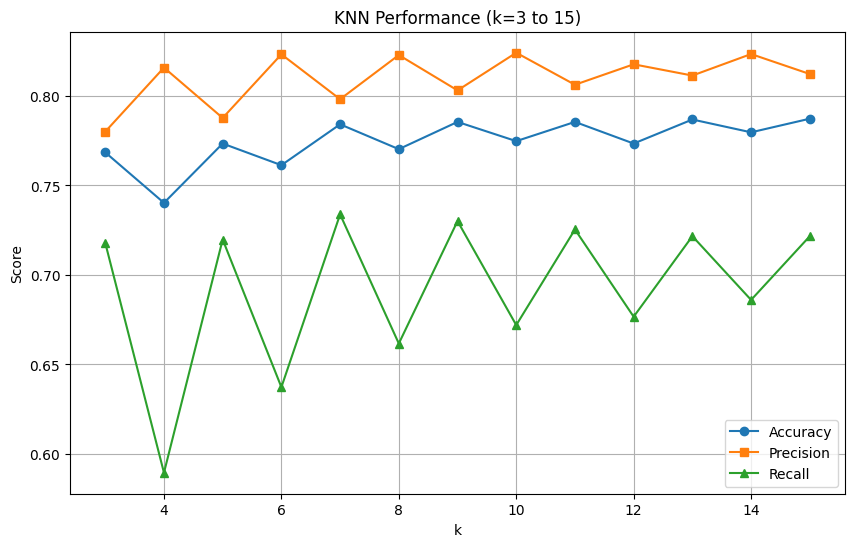

✅ بهترین مقدار k: 15


In [7]:
k_values = range(3, 16)
acc_list, prec_list, rec_list = [], [], []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc_list.append(accuracy_score(y_test, y_pred))
    prec_list.append(precision_score(y_test, y_pred))
    rec_list.append(recall_score(y_test, y_pred))

# نمودار عملکرد KNN
plt.figure(figsize=(10,6))
plt.plot(k_values, acc_list, marker='o', label='Accuracy')
plt.plot(k_values, prec_list, marker='s', label='Precision')
plt.plot(k_values, rec_list, marker='^', label='Recall')
plt.title('KNN Performance (k=3 to 15)')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(acc_list)]
print(f"✅ بهترین مقدار k: {best_k}")


Decision Tree -> Accuracy: 0.763, Precision: 0.758, Recall: 0.740


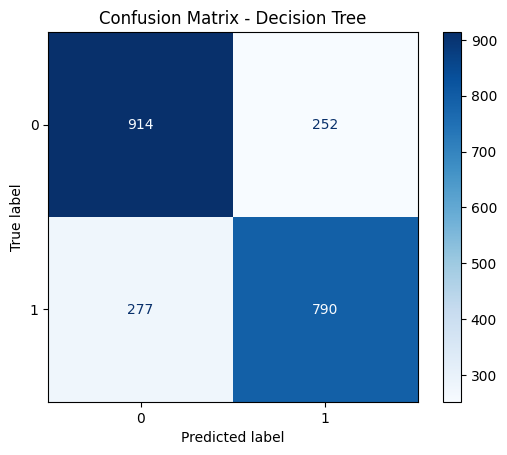

In [8]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)

print(f"Decision Tree -> Accuracy: {acc_dt:.3f}, Precision: {prec_dt:.3f}, Recall: {rec_dt:.3f}")

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


Random Forest -> Accuracy: 0.833, Precision: 0.808, Recall: 0.854


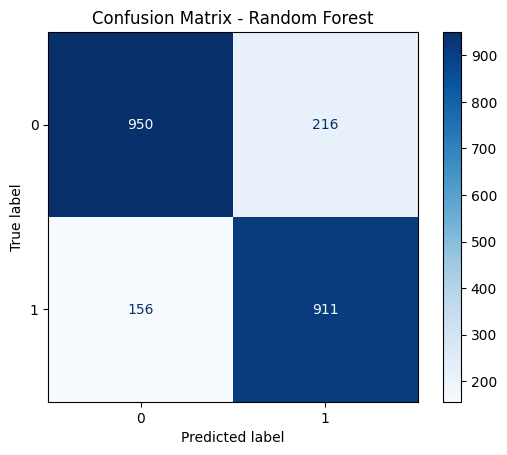

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)

print(f"Random Forest -> Accuracy: {acc_rf:.3f}, Precision: {prec_rf:.3f}, Recall: {rec_rf:.3f}")

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


SVM -> Accuracy: 0.813, Precision: 0.792, Recall: 0.826


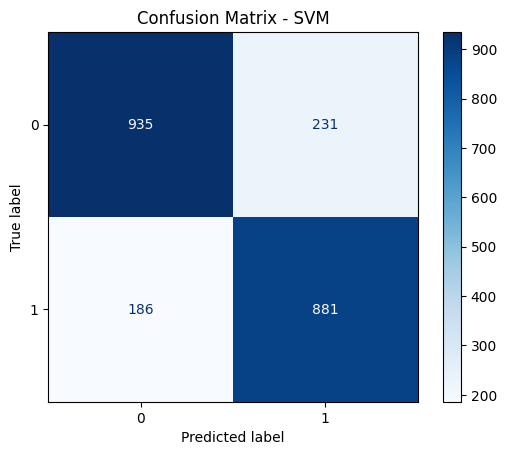

In [10]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)

print(f"SVM -> Accuracy: {acc_svm:.3f}, Precision: {prec_svm:.3f}, Recall: {rec_svm:.3f}")

ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()



📊 مقایسه نهایی الگوریتم‌ها:
             Model  Accuracy  Precision    Recall
0  KNN (best k=15)  0.787282   0.812236  0.721649
1    Decision Tree  0.763099   0.758157  0.740394
2    Random Forest  0.833408   0.808341  0.853796
3              SVM  0.813256   0.792266  0.825679


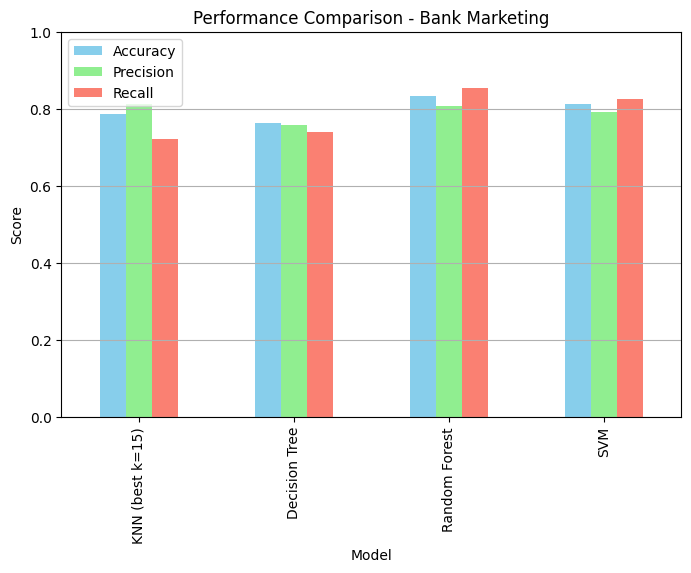

In [11]:
results = pd.DataFrame({
    'Model': [f'KNN (best k={best_k})', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [max(acc_list), acc_dt, acc_rf, acc_svm],
    'Precision': [prec_list[np.argmax(acc_list)], prec_dt, prec_rf, prec_svm],
    'Recall': [rec_list[np.argmax(acc_list)], rec_dt, rec_rf, rec_svm]
})

print("\n📊 مقایسه نهایی الگوریتم‌ها:")
print(results)

results.plot(
    x='Model',
    y=['Accuracy', 'Precision', 'Recall'],
    kind='bar',
    figsize=(8,5),
    color=['skyblue','lightgreen','salmon']
)
plt.title("Performance Comparison - Bank Marketing")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(True, axis='y')
plt.show()
